In [12]:
#  DEMO script (python version) for calculating local orthogonalization and its application in random noise attenuation 
#  
#  Copyright (C) 2022 Yangkang Chen
#  
#  This program is free software: you can redistribute it and/or modify
#  it under the terms of the GNU General Public License as published
#  by the Free Software Foundation, either version 3 of the License, or
#  any later version.
#
#  This program is distributed in the hope that it will be useful,
#  but WITHOUT ANY WARRANTY; without even the implied warranty of
#  MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
#  GNU General Public License for more details: http://www.gnu.org/licenses/
#  
#  Reference:   1. Random noise attenuation using local signal-and-noise orthogonalization
#               Chen and Fomel, 2015, Geophysics
#               2. Ground-Roll Noise Attenuation Using a Simple and Effective Approach Based on 
#               Local Band-Limited Orthogonalization, Chen et al., 2015, IEEE Geoscience and Remote Sensing Letters
#               3. Iterative deblending with multiple constraints based on shaping regularization,
#               Chen, 2015, IEEE Geoscience and Remote Sensing Letters
#               4. Orthogonalized morphological reconstruction for weak signal detection in micro-seismic monitoring:
#               Methodology, Huang et al., 2018, GJI
#               5. Surface-related multiple leakage extraction using local primary-and-multiple 
#               orthogonalization, Zhang et al., 2020, Geophysics
#               6. Non-stationary local signal-and-noise orthogonalization, Chen et al.,
#               2021, Geophysics
#               7. Local primary-and-multiple orthogonalization for leaked internal multiple crosstalk estimation and attenuation on full-wavefield migrated images
#               Zhang, et al., 2021, Geophysics
#               8. Huang et al., 2016, Damped multichannel singular spectrum analysis for 3D random noise attenuation, Geophysics, 81, V261-V270.


## Generate synthetic data and adding noise



In [30]:
import numpy as np
import matplotlib.pyplot as plt
import src as lo #lo: local orthogonalization

## generate the synthetic data
a1=np.zeros([300,80])
[n,m]=a1.shape
a3=a1.copy();
a4=a1.copy();

k=-1;
a=0.1;
b=1;
pi=np.pi

ts=np.arange(-0.055,0.055+0.002,0.002)
b1=np.zeros([len(ts)])
b2=np.zeros([len(ts)])
b3=np.zeros([len(ts)])
b4=np.zeros([len(ts)])

for t in ts:
    k=k+1;
    b1[k]=(1-2*(pi*30*t)*(pi*30*t))*np.exp(-(pi*30*t)*(pi*30*t));
    b2[k]=(1-2*(pi*40*t)*(pi*40*t))*np.exp(-(pi*40*t)*(pi*40*t));
    b3[k]=(1-2*(pi*40*t)*(pi*40*t))*np.exp(-(pi*40*t)*(pi*40*t));
    b4[k]=(1-2*(pi*30*t)*(pi*30*t))*np.exp(-(pi*30*t)*(pi*30*t));

t1=np.zeros([m],dtype='int')
t3=np.zeros([m],dtype='int')
t4=np.zeros([m],dtype='int')
for i in range(m):
  t1[i]=np.round(140);
  t3[i]=np.round(-2*i+220);
  t4[i]=np.round(2*i+10);
  a1[t1[i]:t1[i]+k+1,i]=b1; 
  a3[t3[i]:t3[i]+k+1,i]=b1; 
  a4[t4[i]:t4[i]+k+1,i]=b1; 

d0=a1[0:300,:]+a3[0:300,:]+a4[0:300,:];

## add noise
[n1,n2]=d0.shape
np.random.seed(201415)
n=0.1*np.random.randn(n1,n2);
dn=d0+n;
print(np.std(dn))

0.24484765391958788


## Applying DRR and local orthogonalization

In [31]:


d1=lo.drr3d(dn,0,120,0.004,3,1);	#DRR (when damping factor =1, there are heavy damages)
noi1=dn-d1;


## calculate local orthogonalization
rect=[20,20,1];
eps=0;
niter=20;
verb=1;
[d2,noi2,low]=lo.localortho(d1,noi1,rect,niter,eps,verb);
## Use Python 3 (Windows)
d2 = np.squeeze(d2)  
noi2 = np.squeeze(noi2)
## calculate local similarity
simi1=lo.localsimi(d1,noi1,[5,5,1],niter,eps,verb);
simi2=lo.localsimi(d2,noi2,[5,5,1],niter,eps,verb);
## Use Python 3 (Windows)
simi1 = np.squeeze(simi1)  
simi2 = np.squeeze(simi2)
## compare SNR
print('SNR of initial denoising is %g'%lo.snr(d0,d1));
print('SNR of local orthogonalization is %g'%lo.snr(d0,d2));

flow= 0 fhigh= 120 dt= 0.004 N= 3 K= 1 verb= 0
iteration: 1, res: 1 !
iteration: 2, res: 0.950607 !
iteration: 3, res: 0.942601 !
iteration: 4, res: 0.941973 !
iteration: 5, res: 0.941412 !
iteration: 6, res: 0.93998 !
iteration: 7, res: 0.938359 !
iteration: 8, res: 0.937215 !
iteration: 9, res: 0.935922 !
iteration: 10, res: 0.934674 !
iteration: 11, res: 0.93311 !
iteration: 12, res: 0.932404 !
iteration: 13, res: 0.931695 !
iteration: 14, res: 0.931283 !
iteration: 15, res: 0.931047 !
iteration: 16, res: 0.93078 !
iteration: 17, res: 0.930588 !
iteration: 18, res: 0.930488 !
iteration: 19, res: 0.930377 !
iteration: 20, res: 0.930296 !
iteration: 1, res: 1 !
iteration: 2, res: 0.942869 !
iteration: 3, res: 0.931235 !
iteration: 4, res: 0.928262 !
iteration: 5, res: 0.923839 !
iteration: 6, res: 0.921352 !
iteration: 7, res: 0.919891 !
iteration: 8, res: 0.917761 !
iteration: 9, res: 0.916108 !
iteration: 10, res: 0.914419 !
iteration: 11, res: 0.91265 !
iteration: 12, res: 0.910687

## Plot results

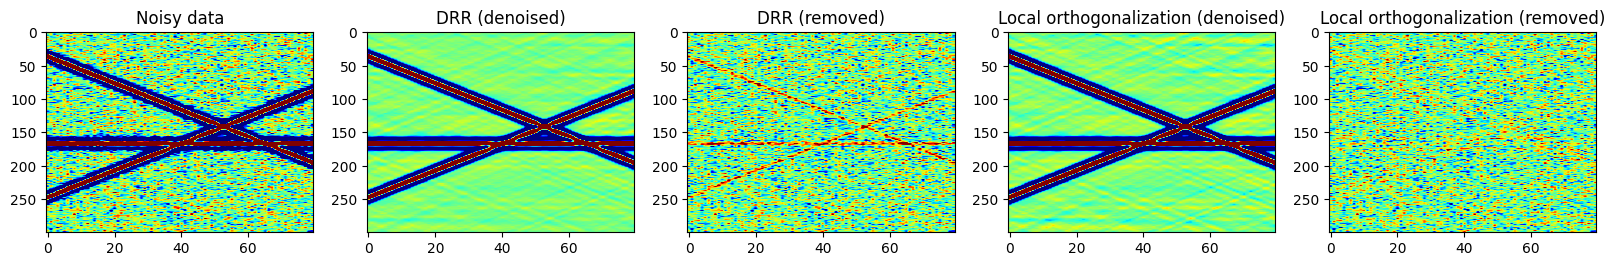

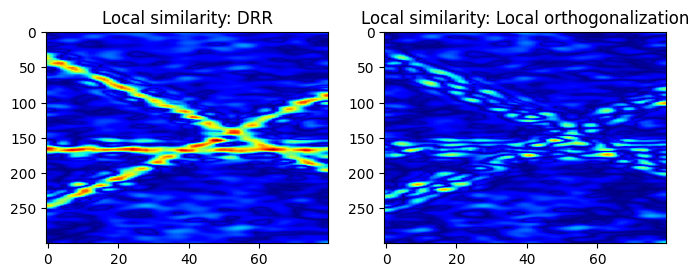

In [32]:
# plotting denoised and removed noise section for DRR method and after applying local orthogonalization.
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1,5,1)
# ax.set_xticks([])
# ax.set_yticks([])
plt.imshow(dn,cmap='jet',clim=(-0.2, 0.2),aspect=0.2)
plt.title('Noisy data');
fig.add_subplot(1,5,2)
plt.imshow(d1,cmap='jet',clim=(-0.2, 0.2),aspect=0.2)
plt.title('DRR (denoised)');
fig.add_subplot(1,5,3)
plt.imshow(noi1,cmap='jet',clim=(-0.2, 0.2),aspect=0.2)
plt.title('DRR (removed)');
fig.add_subplot(1,5,4)
plt.imshow(d2,cmap='jet',clim=(-0.2, 0.2),aspect=0.2)
plt.title('Local orthogonalization (denoised)');
fig.add_subplot(1,5,5)
plt.imshow(noi2,cmap='jet',clim=(-0.2, 0.2),aspect=0.2)
plt.title('Local orthogonalization (removed)');
plt.show()

# plotting Local similarity for DRR method and after applying local orthogonalization.
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(1, 2, 1)
plt.imshow(simi1,cmap='jet',clim=(0,1),aspect=0.2)
plt.title('Local similarity: DRR');
fig.add_subplot(1, 2, 2)
plt.imshow(simi2,cmap='jet',clim=(0,1),aspect=0.2)
plt.title('Local similarity: Local orthogonalization');
plt.show()
